# ML Project 1: Star Categorization Giants and Dwarfs 

The main objective of this project is to perform a binary classification by identifying Giants and Dwarfs using different classification methods such as Logistic Regression, Neural Networks and Support Vector Machines (SVM).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import KFold
plt.style.use('dark_background')

## <a class="anchor" id="feature-analysis">1 - Index of Contents</a>

2 - [Feature Analysis](#feature-analysis)  
> 2.1 - [Dropping the unhelpful "SpType Column"](#drop-SpColumn) \
> 2.2 - [Outliers](#outliers) 

3 - [Feature Normalization, Data Visualization and Creation of new features
](#featureNormalization)
> 3.1 - [Automatic Feature clipping](#autoClipping) \
> 3.2 - [Data Visualization](#dataVisualization) \
> 3.3 - [Feature Normalization: Rescaling with Min-Max Normalization](#minMaxNormalization) \
> 3.4 - [Feature Mapping](#featuremapping) 

4 - [3 way split: Creation of Train, Dev and Test Sets](#3waySplit)

5 - [Logistic Regression](#logisticRegretion)
> 5.1 - [Sigmoid function](#sigFunc) \
> 5.2 - [Cost Function and Gradient descend with Ridge Regression](#costFunc) \ 
> 5.3 - [Gradient Descent](#gradDescent) \
> 5.4 - [Accuracy Model and F1-Score (with Learning Curve and Validation Curve)](#accModel) 

6 - [Neural Networks](#NN)
> 6.1 - [NN Cost Function with Backpropagation](#nnCost) \
> 6.2 - [Sigmoid Gradient](#sigGrad) \
>6.3 - [Random Initialization of the Weights](#randInitialization) \
> 6.4 - [Gradient Descent with Adaptive Learning Rate and Momentum](#gradDesc) \
> 6.5 - [ Binary Classification Prediction Function](#binClassPredFunc) \
> 6.6 - [testing the Neural Network](#testNNN)


7 - [SVM](#SVM)
> 7.1 - [SVM Classifier](#SVM_Classifier) \
> 7.2 - [Best SVM Score](#SVM_Best) \
> 7.3 - [Second SVM Example](#SVM_Sec) \
> 7.4 - [KFold](#KFols)

## <a class="anchor" id="feature-analysis">2 - Feature Analysis</a>

In the dataset that is going to be used, there are 5 of the 6 types of features that will help us with the classification. They are:

<ul>
    <li><b>Vmag</b> - Visual Apparent Magnitude of the Star</li>
    <li><b>Plx</b> - Distance Between the Star and the Earth</li>
    <li><b>e_Plx</b> - Standard Error of Plx</li>
    <li><b> B-V</b> - B-V color index </li>
    <li><b> SpType</b> - Stellar classification. </li>
    <li> <b>Amag </b>- Absolute Magnitude of the Star. </li>
</ul>

Note that B-V Color Index describes the color of the star and it rangesbetween zero or negative for an hot (blueish) star and 2.0 fora cold star, and the Absolute Magnitude  of  the  star is a feature that is created bu the following formula: $$M=m+ 5(log^p_{10}+ 1)$$, where $M$ means the absolute magnitude, $m$ means the visual apparent magnitude and $p$ means the stellar parallax,  also  known  as  the  distance  from  Earth,  in  a  more simplified way.

In [2]:
csv_string = "dataset/Star3642_balanced.csv"
data = pd.read_csv(csv_string)

data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


### <a class="anchor" id="drop-SpColumn"> 2.1 - Dropping the unhelpful "SpType Column" </a>

The column that is not helpful is "SpType" because this column has the codename classification of the stars in the dataset. This is only helpful to generate the "TargetClass Column" if the user only have the raw dataset and needs to perform a data cleaning. In this project we are using a balanced dataset with the data already cleaned. The image below help us understand better how the identification is done, by using primaraly the roman numerals to identify between Dwarfs and Giants.


<img src="pictures/HR_Diagram.png" width="25%">

That being said, we are now going to drop that column and convert the our labels, present in the column "TargetClass" to float:

In [3]:
data.drop('SpType', inplace=True, axis=1)
data['TargetClass'] = data['TargetClass'].astype('int64')

data.describe() 

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


### <a class="anchor" id="outliers">2.2 - Outliers </a>

An outlier is an observation that that differs significantly from other observations, although they sometimes need to be excluded of the dataset to proper data analysis, in this case they are generally necessary to contribute to a good perform of the binary classification. The only outliers the need to be excluded are the ones on the "e_Plx" column as they mean an error on the measures of the "Plx" column. The outliers can be vizualized in the graphic below

Text(0, 0.5, 'Column values')

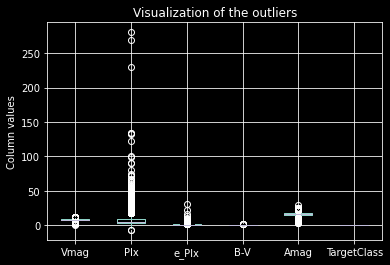

In [4]:
data.boxplot()
plt.title("Visualization of the outliers")
plt.ylabel("Column values")

## <a class="anchor" id="featureNormalization"> 3 - Feature Normalization, Data Visualization and Creation of new features   </a>

### <a class="anchor" id="autoClipping"> 3.1 Automatic Feature clipping </a>

We have seen that the outliers in the column "e_Plx" contribute to a lower performance since they are an experimental error. Limiting data to $N\sigma$ with $N = 1.4$ will help us have stability when training the data.

In [5]:
threshold = data.iloc[:, 2].std()*1.4
data = data[(data.iloc[:, 2]<threshold)] 

data_v = data.values 

x = data_v[:, :-1]
y = data_v[:, -1].reshape(len(x), 1)

In [6]:
# Data statistics
data.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,7.758164,7.580499,0.942259,0.857480,16.086859,0.425370
std,1.252093,11.465107,0.189165,0.455365,2.258541,0.494488
min,0.450000,-2.760000,0.470000,-0.196000,2.820000,0.000000
25%,7.030000,2.770000,0.800000,0.490500,14.957027,0.000000
50%,8.020000,4.940000,0.940000,0.944000,16.059792,0.000000
75%,8.700000,8.645000,1.100000,1.168000,17.564272,1.000000
max,10.270000,280.270000,1.280000,2.530000,25.362305,1.000000


### <a class="anchor" id="dataVisualization"> 3.2 - Data Visualization  </a>

In this section we chose to visualize some key aspects of the stars, namely the relation between the Apparent and Absolute magnitudes of a star with its Color Index. We chose this data to be plotting because they have a great distinguish alongside the $x$ and $y$ axis between who is a Dwarf or a Giant. 

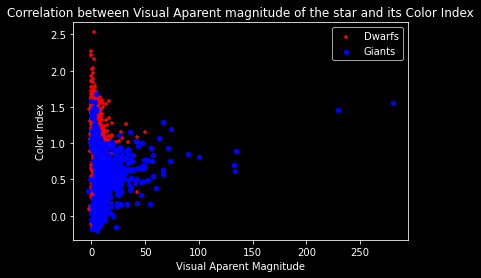

In [7]:
Giants=(y==1) 
Dwarfs=(y==0)

plt.scatter(x[Dwarfs[:, 0],1],x[Dwarfs[:, 0],3],c="r",marker="+", s=20)
plt.scatter(x[Giants[:, 0],1],x[Giants[:, 0],3],c="b",marker="o", s=20)  
plt.title("Correlation between Visual Aparent magnitude of the star and its Color Index")
plt.xlabel("Visual Aparent Magnitude")
plt.ylabel("Color Index") 
plt.legend(["Dwarfs", "Giants"])

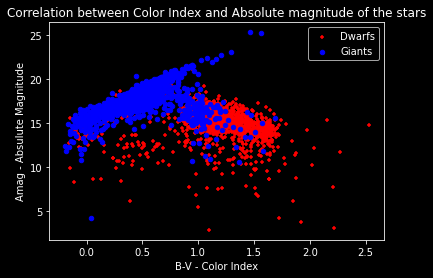

In [8]:
plt.scatter(x[Dwarfs[:, 0],3],x[Dwarfs[:, 0],4],c="r",marker="+", s=20)
plt.scatter(x[Giants[:, 0],3],x[Giants[:, 0],4],c="b",marker="o", s=20)  
plt.title("Correlation between Color Index and Absolute magnitude of the stars")
plt.xlabel("B-V - Color Index")
plt.ylabel("Amag - Absulute Magnitude")
plt.legend(["Dwarfs", "Giants"])

### <a class="anchor" id="minMaxNormalization"> 3.3 Feature Normalization: Rescaling with Min-Max Normalization </a>
We chose to normalize our feature set due to the wide range of values that the dataset has. Without one normalization method, the training data would rather diverge instead of converging. Also, narrowing the data to an interval between 0 and 1 would make the training data converge even faster than other methods such as standardization by Z-score, that still also make our training data to diverge.

The formula of the Min-Max Normalization is given by:
$$x' = \frac{x-min(x)}{max(x)-min(x)}$$

In [9]:
def minMaxNormalization(X):
    return (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

### <a class="anchor" id="featuremapping"> 3.4 - Feature Mapping </a>
Feature mapping will help us fit the data better in our classification algorithms, helping having better accuracy scores. This quadratic function will make some combinations of two features of the dataset, in order to give a better outcome than considering just a linear function.

In [10]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return polynomial terms up to the given degree
    """
    out = np.ones((len(x1),1))
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out[:, 3:] 

In [11]:
degree=5

xmap1 = mapFeature(x[:, 0],x[:, 1] ,degree)
xmap2 = mapFeature(x[:, 1],x[:, 2] ,degree)
xmap3 = mapFeature(x[:, 2],x[:, 3] ,degree)
xmap4 = mapFeature(x[:, 3],x[:, 4] ,degree)

x = np.hstack((x, np.hstack((xmap1, xmap2, xmap3, xmap4))))

x_data  = minMaxNormalization(x)
y_data  = y

## <a class="anchor" id="3waySplit"> 4 - 3 way split: Creation of Train, Dev and Test Sets </a>
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to under-fit, while models with high variance over-fit the training data. To help us identify if our models are underfitting or overfitting with the training data, we have splitted our dataset in 3 sets: the training set, used to train our models, the validation set and the testing set to compute and compare the model accuracy.

In [12]:
x_train, x_cv, y_train , y_cv = train_test_split(x_data,y_data, test_size = 0.20)
x_train, x_test, y_train , y_test = train_test_split(x_train,y_train, test_size = 0.20)

## <a class="anchor" id="logisticRegretion"> 5 - Logistic Regression </a>

This is a classification problem, so it means that we must chose the right algorithms/models to deal with such problem. One classic model to do this task is the Logistic Regression. Logistic Regression deals very well with a training dataset with 77 features made with the function $mapFeature()$

### <a class="anchor" id="sigFunc"> 5.1 - Sigmoid function </a>


In [13]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### <a class="anchor" id="costFunc"> 5.2 - Cost Function and Gradient descend with Ridge Regression </a>

We chose to implement the cost function and the Gradient Descend with regularization in case our model over-fit the training data.
The Regularization method chosen was Ridge Regression ($\frac{\lambda}{2m}\sum_{j=1}^{n}\theta^2_j$). It will keep the features created to fit the data better.


In [14]:
 def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    #number of training examples 
    m= len(X)
        
    #vector of the model predictions for all training examples      
    h = sigmoid(np.dot(X, theta))
    
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h)) 
    
    #cost function without regularization term
    cost = sum(error)/m
    
    #add regularization term to the cost function
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2) 
    
    #gradient of theta_0
    grad_0= (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    #vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all=np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

### <a class="anchor" id="gradDescent"> 5.3 - Gradient Descent </a>
Used to find a local minimum by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. It also performs the parameter updating ($\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)$).

In [15]:
def gradientDescentReg(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        
        #call CostFunctionReg 
        cost, grad = costFunctionReg(X,y,theta,  Lambda)
        
        #update theta
        theta = theta - (alpha)*grad
        
        J_history.append(cost)
    
    return theta , J_history 

### <a class="anchor" id="accModel">  5.4 - Accuracy and F1-Score of the model </a>

In [16]:
def classifierPredict(theta,X):
    return X.dot(theta) > 0


For the logistic regression we opted to analyse the accuracy of the model with careful methodologies to diagnose the bias or the variance of the model, like the Learning curve and the Validation Curve. They compute internally a confusion matrix to get the True Positive and Negatives, and the False Positive and Negatives. With those values we compute the accuracy of the classification problem with the following formula: $$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

We also perform the F1-Score to be compared with the Accuracy Score... F1-Score is the harmonic mean of Precision and Recall (both also calculated in the following code) and is given by the formula $F1Score = 2*\frac{Precision*Recall}{Precision+Recall}$, and it give us a better measure by penalizing the extreme output values. 

#### Learning Curve


A learning curve plots the score over various numbers of training samples, which will help us see if the current size of the batch is benefiting from more data or if it is biased.

In [17]:
def learningCurve(X, y, Xval, yval, learn_rate, num_iter, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m, n = X.shape
    mval=len(yval)
    acc_train, acc_val = [],[]
    
    for i in range(10,m+1,100):
        
        initial_theta=np.zeros((n,1))
        
        Xtrain=X[0:i,:]
        ytrain=y[0:i,:]
        
        theta = gradientDescentReg(Xtrain, ytrain,initial_theta,learn_rate,num_iter,Lambda)[0]
        
        h_train = classifierPredict(theta, Xtrain) 
        h_val = classifierPredict(theta, Xval)
        
        confusion_train = confusion_matrix(ytrain, h_train)
        TP_train, TN_train, FP_train, FN_train = confusion_train[1, 1], confusion_train[0, 0], confusion_train[0, 1], confusion_train[1, 0]
        accuracy_train = (TP_train+TN_train)/float(TP_train+TN_train+FP_train+FN_train)
        
        confusion_val = confusion_matrix(yval, h_val)
        TP_val, TN_val, FP_val, FN_val = confusion_val[1, 1], confusion_val[0, 0], confusion_val[0, 1], confusion_val[1, 0]
        accuracy_val = (TP_val+TN_val)/float(TP_val+TN_val+FP_val+FN_val)
        
        acc_train.append(accuracy_train)
        acc_val.append(accuracy_val) 

    return np.array(acc_train), np.array(acc_val)

(0.0, 100.0)

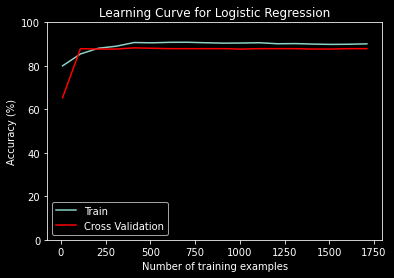

In [18]:
x_train_lr = np.append(np.ones((len(x_train), 1)), x_train, axis=1)
x_cv_lr = np.append(np.ones((len(x_cv), 1)), x_cv, axis=1)
x_test_lr = np.append(np.ones((len(x_test), 1)), x_test, axis=1)

y_train_lr = y_train
y_cv_lr = y_cv
y_test_lr = y_test  

Lambda = 1
initial_theta = np.zeros((x_train_lr.shape[1],1))
accuracy_train, accuracy_val = learningCurve(x_train_lr, y_train_lr, x_cv_lr, y_cv_lr, 1.5, 400, Lambda) #1000

plt.plot(range(10,x_train_lr.shape[0]+1, 100),accuracy_train*100)
plt.plot(range(10,x_train_lr.shape[0]+1, 100), accuracy_val*100,color="r")
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Cross Validation"])
plt.ylim(0,100)


   #### Validation Curve
   The validation curve plots the score over a varying hyper parameter, in this case over the Lambda. This will help us choose the best value for the regularization parameter $\lambda$ or even if we need a regularizator at all, as well as see the accuracy score of the model and its bias or variance.

In [19]:
def validationCurve(X, y, Xval, yval, learn_rate, num_iter, Lambda_array):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m, n = X.shape
    mval=len(yval)
    acc_train, acc_val = [],[]
    
    for lam in Lambda_array:
        
        initial_theta=np.zeros((n,1))
        
        theta = gradientDescentReg(X, y,initial_theta,learn_rate,num_iter,lam)[0]
        
        h_train = classifierPredict(theta, X) 
        h_val = classifierPredict(theta, Xval) 
        
        confusion_train = confusion_matrix(y, h_train) 
        TP_train, TN_train, FP_train, FN_train = confusion_train[1, 1], confusion_train[0, 0], confusion_train[0, 1], confusion_train[1, 0]
        accuracy_train = (TP_train+TN_train)/float(TP_train+TN_train+FP_train+FN_train)
        
        confusion_val = confusion_matrix(yval, h_val)
        TP_val, TN_val, FP_val, FN_val = confusion_val[1, 1], confusion_val[0, 0], confusion_val[0, 1], confusion_val[1, 0]
        accuracy_val = (TP_val+TN_val)/float(TP_val+TN_val+FP_val+FN_val)
        
        acc_train.append(accuracy_train)
        acc_val.append(accuracy_val)

    return np.array(acc_train), np.array(acc_val), Lambda_array[np.argmax(acc_val)]

Best Lambda:  0
Accuracy of Train Data:  90.0 %
Accuracy of Cross Validation:  87.906 %
Accuracy of Test Data:  90.971 %

F1-Score of Train Data: 88.332 %
F1-Score of Cross Validation Data: 86.354 %
F1-Score of Test Data: 88.764 %


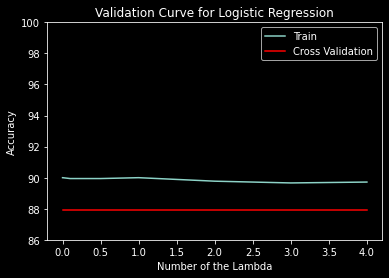

In [20]:
Lambda = [0, 0.001, 0.1, 0.5, 1, 2, 3, 4]
learning_rate = 1.5
num_iter = 400 

accuracy_train, accuracy_val, best_lam = validationCurve(x_train_lr, y_train_lr, x_cv_lr, y_cv_lr, learning_rate, num_iter, Lambda) #1000
print("Best Lambda: ", best_lam)

plt.plot(Lambda ,accuracy_train*100)
plt.plot(Lambda, accuracy_val*100,color="r")
plt.title("Validation Curve for Logistic Regression")
plt.xlabel("Number of the Lambda")
plt.ylabel("Accuracy")
plt.legend(["Train", "Cross Validation"])
plt.ylim(86,100) 

theta_initial = np.zeros((x_train_lr.shape[1],1))
theta = gradientDescentReg(x_train_lr, y_train_lr, theta_initial, learning_rate, num_iter, best_lam)[0]

pred_train = classifierPredict(theta, x_train_lr)  
confusion_train = confusion_matrix(y_train_lr, pred_train)
TP_train, TN_train, FP_train, FN_train = confusion_train[1, 1], confusion_train[0, 0], confusion_train[0, 1], confusion_train[1, 0]
accuracy_train = (TP_train+TN_train)/float(TP_train+TN_train+FP_train+FN_train)
precision_train = (TP_train)/(TP_train + FP_train)
recall_train = (TP_train)/(TP_train + FN_train)
F1_score_train = 2*((precision_train*recall_train)/(precision_train+recall_train))

pred_cv = classifierPredict(theta, x_cv_lr) 
confusion_cv = confusion_matrix(y_cv_lr, pred_cv)
TP_cv, TN_cv, FP_cv, FN_cv = confusion_cv[1, 1], confusion_cv[0, 0], confusion_cv[0, 1], confusion_cv[1, 0]
accuracy_cv = (TP_cv+TN_cv)/float(TP_cv+TN_cv+FP_cv+FN_cv) 
precision_cv = (TP_cv)/(TP_cv + FP_cv)
recall_cv = (TP_cv)/(TP_cv + FN_cv)
F1_score_crossv = 2*((precision_cv*recall_cv)/(precision_cv+recall_cv))

pred_test = classifierPredict(theta, x_test_lr) 
confusion_test = confusion_matrix(y_test_lr, pred_test)
TP_test, TN_test, FP_test, FN_test = confusion_test[1, 1], confusion_test[0, 0], confusion_test[0, 1], confusion_test[1, 0]
accuracy_test = (TP_test+TN_test)/float(TP_test+TN_test+FP_test+FN_test)
precision_test = (TP_test)/(TP_test + FP_test)
recall_test = (TP_test)/(TP_test + FN_test)
F1_score_test = 2*((precision_test*recall_test)/(precision_test+recall_test)) 

print("Accuracy of Train Data: ", round(accuracy_train*100, 3), "%")
print("Accuracy of Cross Validation: ", round(accuracy_cv*100, 3), "%")
print("Accuracy of Test Data: ", round(accuracy_test*100, 3), "%")

print("\nF1-Score of Train Data:", round(F1_score_train*100, 3), "%")
print("F1-Score of Cross Validation Data:", round(F1_score_crossv*100, 3), "%")
print("F1-Score of Test Data:", round(F1_score_test*100, 3), "%")

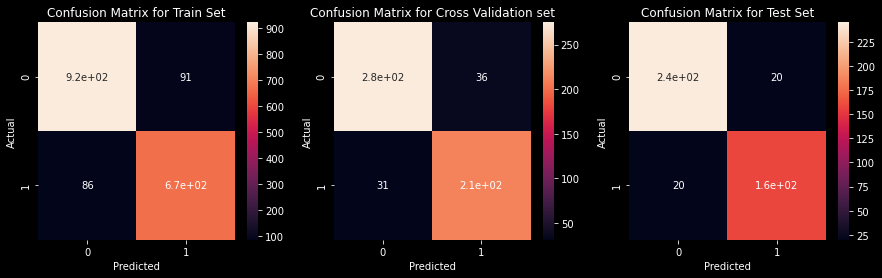

In [21]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.array(labels).reshape(2,2)
sns.heatmap(data=confusion_train, ax=ax1, annot=True)
sns.heatmap(data=confusion_cv, ax=ax2, annot=True)
sns.heatmap(data=confusion_test, ax=ax3, annot=True)
ax1.set_title("Confusion Matrix for Train Set")
ax2.set_title("Confusion Matrix for Cross Validation set")
ax3.set_title("Confusion Matrix for Test Set")
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_xlabel('Predicted')
plt.show()

## <a class="anchor" id="NN"> 6 - Neural Networks </a>

As we know, Logistic Regression is not very efficient for complex nonlinear models. Although the Logistic model is sufficient and efficient already for our problem, we would like to know how much gain we can get with a simple Neural Network with one hidden layer, and see if the trade-off between time and accuracy is worth it or not.

### <a class="anchor" id="nnCost">  6.1 - NN Cost Function with Backpropagation </a>
NN cost function with backpropagation used in classes 

In [22]:
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):
    """
    nn_params contains the parameters unrolled into a vector
    
    compute the cost and gradient of the neural network
    """
    # Reshape nn_params back into the parameters Theta1 and Theta2
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J=0
    X = np.hstack((np.ones((m,1)),X)) 
    y1 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    for i in range(1,num_labels+1):
        y1[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y1[:,j] * np.log(a2[:,j]) - (1-y1[:,j])*np.log(1-a2[:,j]))
    
    cost = 1/m* J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    for i in range(m):
        xi= X[i,:] # 1 X 401
        a1i = a1[i,:] # 1 X 26
        a2i =a2[i,:] # 1 X 10
        d2 = a2i - y1[i,:]
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T)))
        grad1= grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2, reg_J, grad1_reg, grad2_reg

### <a class="anchor" id="sigGrad">  6.2 - Sigmoid Gradient </a>

Used for the backpropagation algorithm to compute the error backpropagation in the hidden layer.
    Formula: $g'(z) = \frac{d}{dz}g(z) = g(z)(1-g(z))$

In [23]:
#Computes the gradient of sigmoid function
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid) 

### <a class="anchor" id="randInitialization">  6.3 - Random Initialization of the Weights </a>

We have implemented the method learned in classes, where $L_{in}$ is the length of the input layer and $L_{out}$ is the length of the output layer of our network.

Formula: $\epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$

In [24]:
def randInitializeWeights(L_in, L_out):
    """
    randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections.
    """
    
    epi = (6**1/2) / (L_in + L_out)**1/2
    
    W = np.random.rand(L_out,L_in +1) *(2*epi) -epi
    
    return W

### <a class="anchor" id="gradDesc"> 6.4 - Gradient Descent with Adaptive Learning Rate and Momentum </a>
    
For this, we decided to implement also the Adaptive Learning rate as it helped find a more suitable $\alpha$ from the initial learning rate. We also added momentum for a better convergence as we experienced rapid convergences.

In [25]:
def gradientDescentnn(X,y,initial_nn_params,num_iters,Lambda, alpha, momentum, input_layer_size, hidden_layer_size, num_labels):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    Theta1 = initial_nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m=len(y)
    J_history =[]
    b = 1
    
    theta1_history = []
    theta2_history = []
    for i in range(num_iters):
        nn_params = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda)[3:]
        if i > 0:
            if (cost > J_history[-1]):
                b = 0.2
            if (cost <= J_history[-1]):
                b = 1.2
        if i < 2:
            Theta1 = Theta1 - (b*alpha * grad1)
            Theta2 = Theta2 - (b*alpha * grad2)
        else:
            Theta1 = Theta1 - (b*alpha * grad1) + momentum*(theta1_history[-1] - theta1_history[-2])
            Theta2 = Theta2 - (b*alpha * grad2) + momentum*(theta2_history[-1] - theta2_history[-2]) 
        J_history.append(cost)
        theta1_history.append(Theta1) 
        theta2_history.append(Theta2)
     
    nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal , J_history

### <a class="anchor" id="binClassPredFunc"> 6.5 -  Binary Classification Prediction Function </a>

In [26]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    
    #number of training examples
    m= len(X) 
    # add an extra column of 1´s corresponding to xo=1
    X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
    
    #Compute the output of the hidden layer (with sigmoid activation functions)
    z1= np.dot(X, Theta1.T)  #Inputs to the hidden layer neurons
    a1= sigmoid(z1)  #Outputs  of the hidden layer neurons
    
    #Add a column of ones
    a1 = np.append(np.ones((m,1)),a1, axis=1) #?
    
    #Compute the output of the output layer (with sigmoid activation functions)
    z2= np.dot(a1, Theta2.T)  #Inputs to the output layer neurons
    a2= sigmoid(z2) #Outputs  of the output layer neurons
    
    return np.where(a2 > 0.5, 1, 0).reshape(m, 1) ## Binary Classification

### <a class="anchor" id="testNNN"> 6.6 - Testing the Neural Network  </a> 

For testing the Neural Network, we did not create a Confusion Matrix too see the accuracy with False/True Positives and Positives due to time constraints. Although we made predictions with the train set and the test set and compare between the two.

In [27]:
x_nn = x_train
y_nn = y_train

xtest_nn = x_test
ytest_nn = y_test

input_layer_size  = x_nn.shape[1]
hidden_layer_size = 4

num_iters=500
num_labels = 1 

Lambda= 0.5
alpha= 2.1
momentum = 0.01

Lambda_alt = 0.5 
alpha_alt = 1.2
momentum_alt = 0.5

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.append(initial_Theta1.flatten(),initial_Theta2.flatten())

nnTheta, nnJ_history = gradientDescentnn(x_nn,y_nn,initial_nn_params,num_iters,Lambda,alpha, momentum, input_layer_size, hidden_layer_size, num_labels)
nnTheta_alt, nnJ_history_alt = gradientDescentnn(x_nn,y_nn,initial_nn_params,num_iters,Lambda_alt,alpha_alt, momentum_alt, input_layer_size, hidden_layer_size, num_labels)


Text(0.5, 1.0, 'Cost function using Gradient Descent')

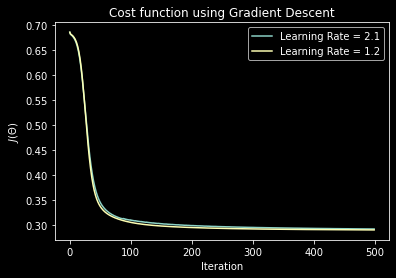

In [28]:
plt.plot(nnJ_history)  #
plt.plot(nnJ_history_alt)
plt.xlabel("Iteration")
plt.legend(["Learning Rate = 2.1", "Learning Rate = 1.2"]) 
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [29]:
Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1) 

pred_test = predict(Theta1, Theta2, xtest_nn)
pred_train = predict(Theta1, Theta2, x_nn)
print("Train Set Accuracy:", round(sum(pred_train==y_nn)[0]/x_nn.shape[0]*100, 3), "%") 
print("Test Set Accuracy:",round(sum(pred_test==ytest_nn)[0]/xtest_nn.shape[0]*100, 3),"%")  

Train Set Accuracy: 90.169 %
Test Set Accuracy: 90.971 %


## <a class="anchor" id="SVM"> 7 - SVM </a>

SVM is the last method implemented, and even though a 90% accuracy was already achieved, it as implemented to see if there was any chance of improving it.

In [30]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [31]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


### <a class="anchor" id="SVM_Classifier"> 7.1 - Classifier </a>

In [32]:
classifier = SVC(C=100, kernel="poly")


### <a class="anchor" id="SVMBest"> 7.2 - Best SVM Score </a>

Score do Train set:  88.136


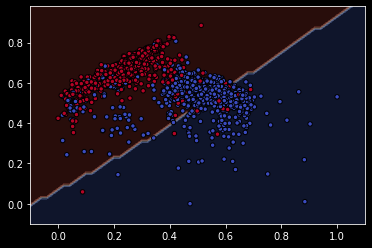

In [33]:
clf = classifier.fit(x_train[:,-2:], np.ravel(y_train))
print("Score do Train set: ", round((classifier.score(x_train[:, -2:], y_train)*100), 3))
ax = plt.subplot()

# Generate grid
xx, yy = make_meshgrid(x_train[:,3], x_train[:,4]) 
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha = 0.2)
ax.scatter(x_train[:, 3], x_train[:, 4], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


### <a class="anchor" id="SVMSec"> 7.3 - Second Example </a>

Score do Train set : 83.39


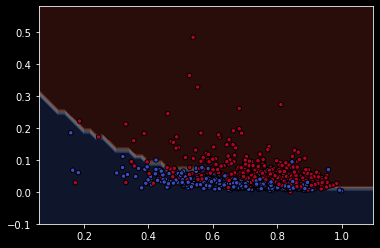

In [34]:
clf = classifier.fit(x_train[:,:2], np.ravel(y_train))
print("Score do Train set :", round((classifier.score(x_train[:,:2], y_train)*100), 3))
ax = plt.subplot()
# Generate grid
xx, yy = make_meshgrid(x_train[:,0], x_train[:,1])
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha = 0.2)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


### <a class="anchor" id="KFold"> 7.4 - KFold </a>

Dividing the data in Traing and Testing sets to cross validate and get Balanced Accuracy and F1 Scores.

In [35]:
balanced_arrayTrain = []
f1_arrayTrain = []
balanced_arrayTest = []
f1_arrayTest = []
matrixTrain = []
matrixTest = []
clf = SVC(kernel = 'poly', C=100).fit(x_train, y_train.ravel())
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(x_data):
    x_train, x_test = x_data[train], x_data[test]
    y_train, y_test = y_data[train], y_data[test]

    predictedTrain = clf.predict(x_train)
    predictedTest = clf.predict(x_test)
    
    confusion_train = confusion_matrix(y_train, predictedTrain.reshape(len(predictedTrain),1))
    TP_train, TN_train, FP_train, FN_train = confusion_train[1, 1], confusion_train[0, 0], confusion_train[0, 1], confusion_train[1, 0]
    matrixTrain.append([TP_train, TN_train, FP_train, FN_train])
    specificity = (TN_train)/(TN_train + FP_train)
    accuracy_train = (TP_train+TN_train)/float(TP_train+TN_train+FP_train+FN_train)
    precision_train = (TP_train)/(TP_train + FP_train)
    recall_train = (TP_train)/(TP_train + FN_train)
    balanced_accuracy = (recall_train + specificity)/2
    balanced_arrayTrain.append(balanced_accuracy)
    F1_score_train = 2*((precision_train*recall_train)/(precision_train+recall_train))
    f1_arrayTrain.append(F1_score_train)
    
    confusion_test = confusion_matrix(y_test, predictedTest.reshape(len(predictedTest),1))
    TP_test, TN_test, FP_test, FN_test = confusion_test[1, 1], confusion_test[0, 0], confusion_test[0, 1], confusion_test[1, 0]
    matrixTest.append([TP_test, TN_test, FP_test, FN_test])
    specificity = (TN_test)/(TN_test + FP_test)
    accuracy_test = (TP_test+TN_test)/float(TP_test+TN_test+FP_test+FN_test)
    precision_test = (TP_test)/(TP_test + FP_test)
    recall_test = (TP_test)/(TP_test + FN_test)
    balanced_accuracy = (recall_test + specificity)/2
    balanced_arrayTest.append(balanced_accuracy)
    F1_score_test = 2*((precision_test*recall_test)/(precision_test+recall_test))
    f1_arrayTest.append(F1_score_test)
    
    
    
print("Average Balanced Accuracy on Train Set: ", round((np.sum(balanced_arrayTrain)/len(balanced_arrayTrain)*100),3))
print("Average F1 Score on Train Set: ", round((np.sum(f1_arrayTrain)/len(f1_arrayTrain)*100),3))
print("Average Balanced Accuracy on Test Set: ", round((np.sum(balanced_arrayTest)/len(balanced_arrayTest)*100),3))
print("Average F1 Score on Train Set: ", round((np.sum(f1_arrayTest)/len(f1_arrayTest)*100),3))

avgMatrixTrain = [sum(vals)/len(matrixTrain) for vals in zip(*matrixTrain)]
avgMatrixTest = [sum(vals)/len(matrixTest) for vals in zip(*matrixTest)]

finalTrain = np.array(avgMatrixTrain).reshape((2,2))
finalTest = np.array(avgMatrixTest).reshape((2,2))

Average Balanced Accuracy on Train Set:  89.632
Average F1 Score on Train Set:  88.122
Average Balanced Accuracy on Test Set:  89.624
Average F1 Score on Train Set:  88.096


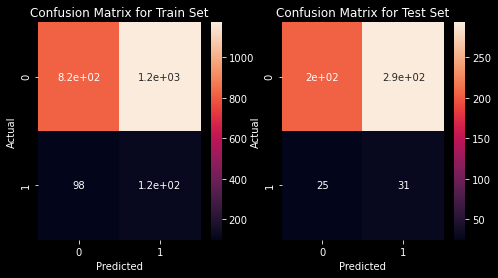

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.array(labels).reshape(2,2)
sns.heatmap(data=finalTrain, ax=ax1, annot=True)
sns.heatmap(data=finalTest, ax=ax2, annot=True)
ax1.set_title("Confusion Matrix for Train Set")
ax2.set_title("Confusion Matrix for Test Set")
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xlabel('Predicted')
plt.show()